# Sparse Auto Encoder

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from neuralnet.classifiers.ae import *
from neuralnet.data_utils import get_mnist_dataset
from neuralnet.solver import Solver


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# # for auto-reloading external modules
# # see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
(x_train, y_train), (x_test, y_test) = get_mnist_dataset()

# x_train -= 127
# x_train = x_test / 255
# x_test -= 127
# x_test = x_test / 255

x_train[x_train < 127] = 0
x_train[x_train >= 127] = 1

x_test[x_test < 127] = 0
x_test[x_test >= 127] = 1


data = {
  'X_train': x_train,
  'y_train': x_train,
  'X_val': x_test,
  'y_val': x_test,
}

(Iteration 1 / 6000) loss: 6177.798811
(Epoch 0 / 50) train dis-simmilarity: 1013.370718; val dis-simmilarity: 10217.926963
(Iteration 51 / 6000) loss: 78.867117
(Iteration 101 / 6000) loss: 51.138222
(Epoch 1 / 50) train dis-simmilarity: 742.721435; val dis-simmilarity: 7430.605354
(Iteration 151 / 6000) loss: 45.114061
(Iteration 201 / 6000) loss: 40.667935
(Epoch 2 / 50) train dis-simmilarity: 627.537698; val dis-simmilarity: 6253.324708
(Iteration 251 / 6000) loss: 24.381486
(Iteration 301 / 6000) loss: 21.023606
(Iteration 351 / 6000) loss: 14.737392
(Epoch 3 / 50) train dis-simmilarity: 567.974247; val dis-simmilarity: 5657.614293
(Iteration 401 / 6000) loss: 10.152477
(Iteration 451 / 6000) loss: 7.118901
(Epoch 4 / 50) train dis-simmilarity: 533.853095; val dis-simmilarity: 5275.265285
(Iteration 501 / 6000) loss: 6.640845
(Iteration 551 / 6000) loss: 8.671901
(Epoch 5 / 50) train dis-simmilarity: 499.707111; val dis-simmilarity: 4977.949211
(Iteration 601 / 6000) loss: 5.00986

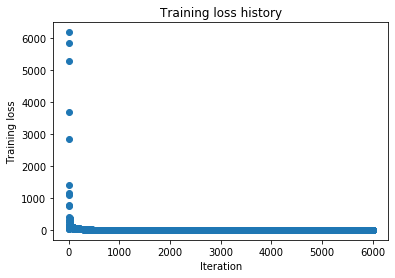

In [4]:
weight_scale = 1e-2  # Experiment with this!
learning_rate = 9e-4  # Experiment with this!
reg = 1e-4
model = AutoEncoder(hidden_dims=[512, 256, 512], reg=reg, weight_scale=weight_scale)

solver = Solver(
                model,
                data,
                print_every=50, num_epochs=50, batch_size=500,
                update_rule='adam',
                optim_config={
                  'learning_rate': learning_rate,
                },
                lr_decay = 0.95
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

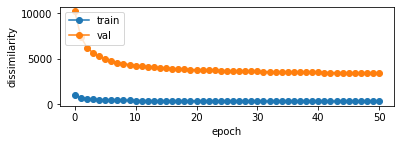

In [5]:
plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('dissimilarity')
plt.show()